In [18]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

data_path = "../data/adam_wbn"
image_path = "./images/adam_wbn"
os.makedirs(image_path,exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
lr_fn = lambda js : js["optimizer"]["lr"]
p_fn = lambda js : js["norm"]["norm_multiply"]
wd_fn = lambda js : js["optimizer"]["lambda_wd"]
get_hyperparam_best_acc(data_path,
                        ["noreg","norm_p1","cnorm_p1","cnormu_p1","gcstdu_p1","norm","cnorm","cnormu","gcstdu","wd"],
                        [lr_fn,lr_fn,lr_fn,lr_fn,lr_fn,p_fn,p_fn,p_fn,p_fn,wd_fn])

Best of noreg is 0.00277778 & 86.12\%
Best of norm_p1 is 0.00025 & 87.14\%
Best of cnorm_p1 is 0.00020661 & 86.4\%
Best of cnormu_p1 is 0.00025 & 87.04\%
Best of gcstdu_p1 is 0.00025 & 87.18\%
Best of norm is 5.2 & 87.32\%
Best of cnorm is 4.0 & 87.18\%
Best of cnormu is 4.4 & 87.52\%
Best of gcstdu is 4.8 & 87.48\%
Best of wd is 3e-08 & 85.46\%


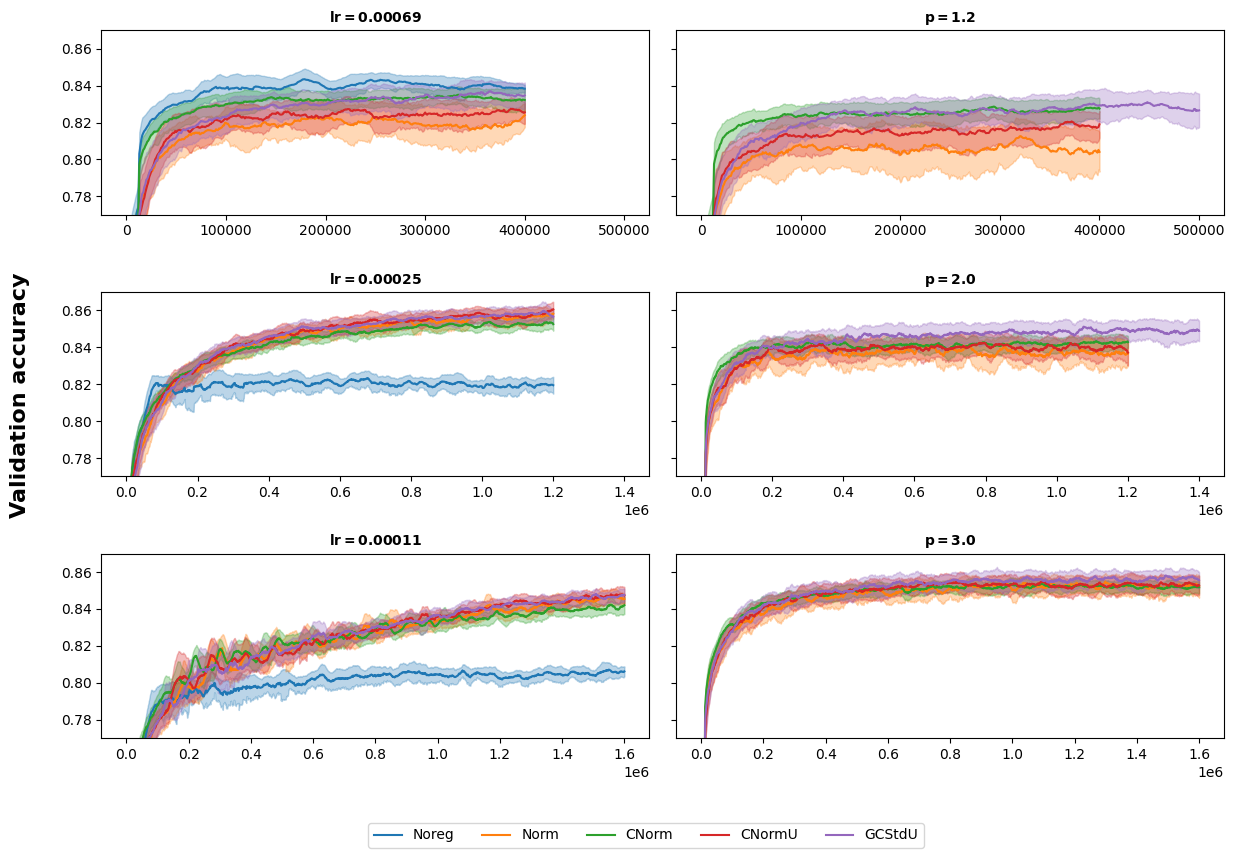

In [ ]:
fig,axs = plt.subplots(ncols=2,nrows=3,sharey="all",sharex="row")

for i,p in enumerate(["1.2","2.0","3.0"]):

    lr = round(0.001/(float(p)**2),5)
    
    for exp,lbl in zip(["noreg","norm_p1","cnorm_p1","cnormu_p1","gcstdu_p1"],["Noreg","Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{lr}","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][0],label=lbl,color=colors[lbl.lower()],smoothing=12)

    for exp,lbl in zip(["norm","cnorm","cnormu","gcstdu"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{p}_1","test_stats")
        plot_step_stat(stats["acc"],axs[i][1],label=lbl,color=colors[lbl.lower()],smoothing=12)
    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'bold'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
fig.set_size_inches(12,8)
fig.tight_layout()
axs[0][0].set_ylim(0.77,0.87)
fig.savefig(f"{image_path}/lr_vs_p.png", bbox_inches='tight',dpi=300)

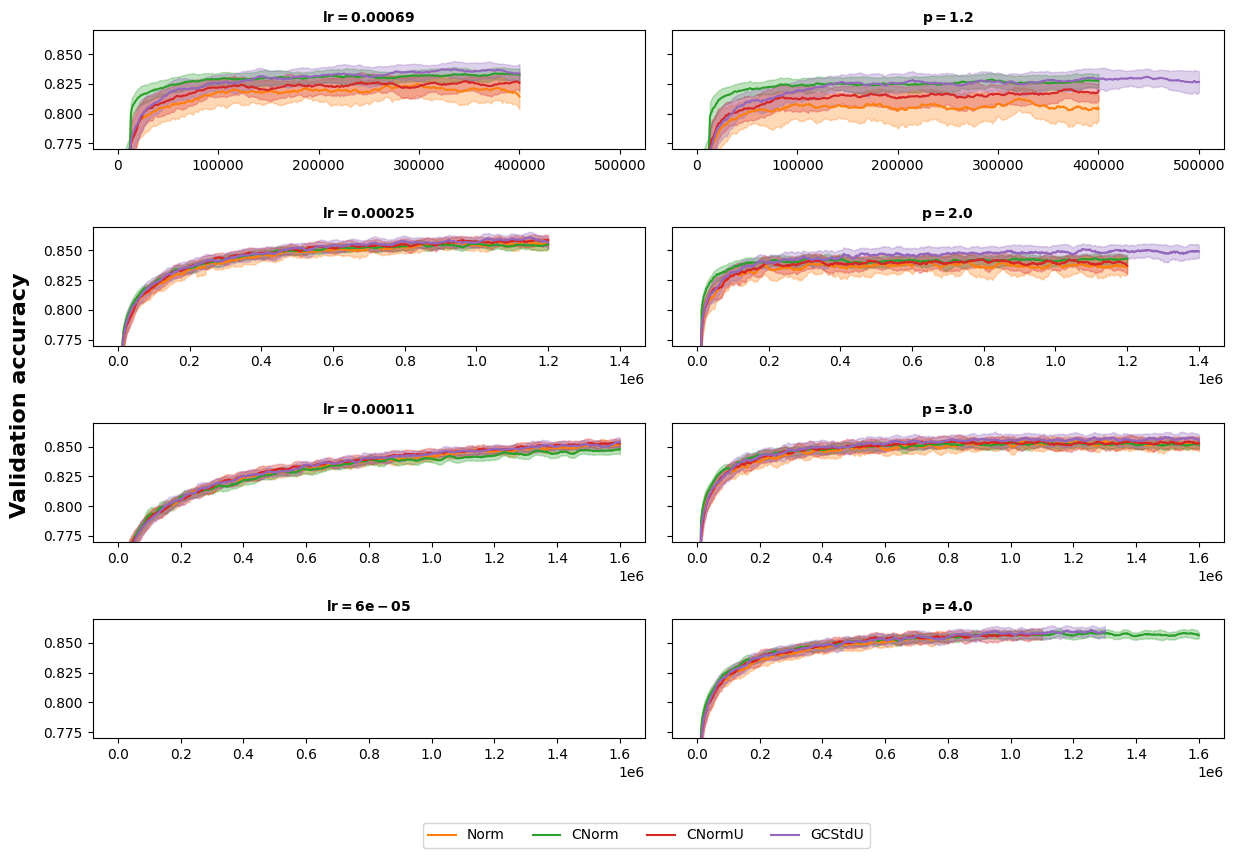

In [16]:
fig,axs = plt.subplots(ncols=2,nrows=4,sharey="all",sharex="row")

for i,p in enumerate(["1.2","2.0","3.0","4.0"]):

    lr = round(0.001/(float(p)**2),5)
    
    for exp,lbl in zip(["norm_p1_lrfix","cnorm_p1_lrfix","cnormu_p1_lrfix","gcstdu_p1_lrfix"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{lr}","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][0],label=lbl,color=colors[lbl.lower()],smoothing=12)

    for exp,lbl in zip(["norm","cnorm","cnormu","gcstdu"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{p}_1","test_stats")
        plot_step_stat(stats["acc"],axs[i][1],label=lbl,color=colors[lbl.lower()],smoothing=12)
    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'bold'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
fig.set_size_inches(12,8)
fig.tight_layout()
axs[0][0].set_ylim(0.77,0.87)
fig.savefig(f"{image_path}/lr_vs_p_corrected.png", bbox_inches='tight',dpi=300)

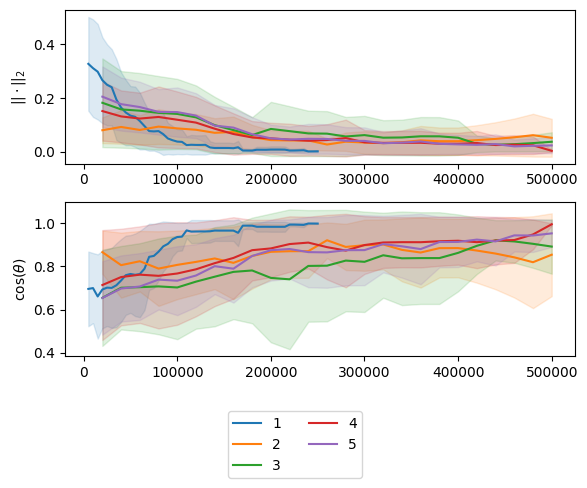

In [50]:
fig,axs = distribution_drift(data_path,["noreg/0.00011","norm_p1/0.00011","cnorm_p1/0.00011","cnormu_p1/0.00011","gcstdu_p1/0.00011"],
                             [1,2,3,4,5],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]],drift_keys=["out"])

fig.set_size_inches(6,4)
fig.tight_layout()


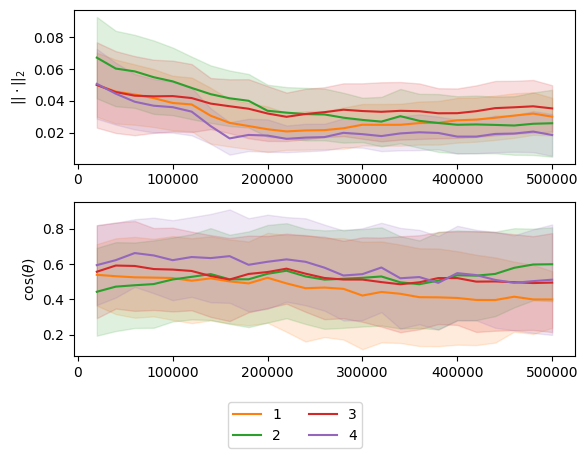

In [52]:
fig,axs = distribution_drift(data_path,["norm/3.0_1","cnorm/3.0_1","cnormu/3.0_1","gcstdu/3.0_1"],
                             [1,2,3,4],
                             [colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]],drift_keys=["out"])

fig.set_size_inches(6,4)
fig.tight_layout()


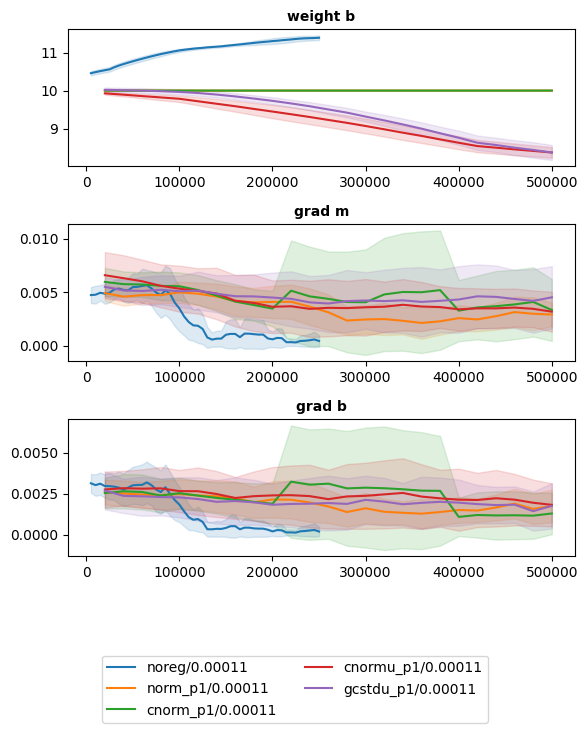

In [55]:

fig,axs = mg_spacing(data_path,["noreg/0.00011","norm_p1/0.00011","cnorm_p1/0.00011","cnormu_p1/0.00011","gcstdu_p1/0.00011"],
                     ["noreg/0.00011","norm_p1/0.00011","cnorm_p1/0.00011","cnormu_p1/0.00011","gcstdu_p1/0.00011"],
                     [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]],"mg_spacing_0",layer="conv")

fig.set_size_inches(6,6)
fig.tight_layout()


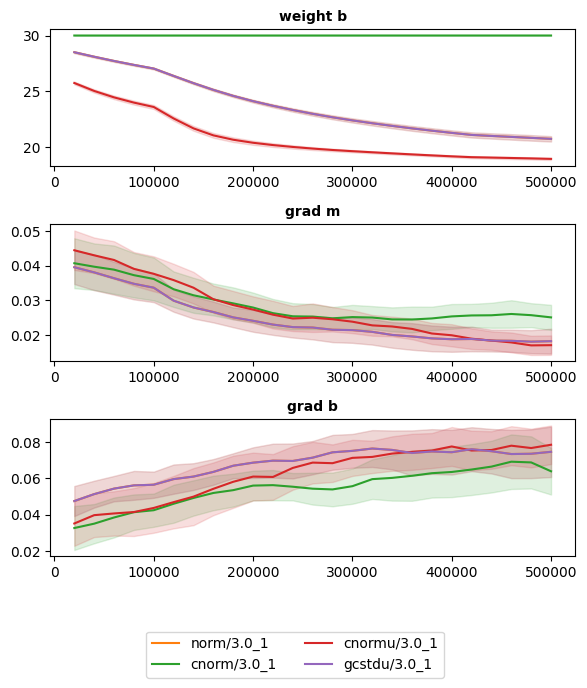

In [56]:

fig,axs = mg_spacing(data_path,["norm/3.0_1","cnorm/3.0_1","cnormu/3.0_1","gcstdu/3.0_1"],
                     ["norm/3.0_1","cnorm/3.0_1","cnormu/3.0_1","gcstdu/3.0_1"],
                     [colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]],"mg_spacing_0",layer="conv")

fig.set_size_inches(6,6)
fig.tight_layout()


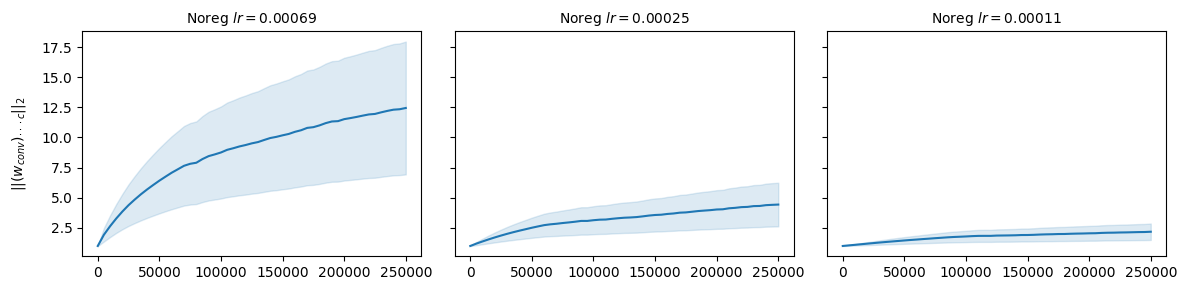

In [23]:
fig,axs = plot_mean_or_norm([f"{data_path}/noreg/0.00069",f"{data_path}/noreg/0.00025",f"{data_path}/noreg/0.00011"],
                            [r"Noreg $lr=0.00069$",r"Noreg $lr=0.00025$",r"Noreg $lr=0.00011$"],
                            [colors["noreg"],colors["noreg"],colors["noreg"]],
                            "mg_spacing_0",plot_mean=False,max_step=250000,measure_global=False)
axs[0].set_ylabel(r"$||(w_{conv})_{\cdot \cdot \cdot c}||_2$",font={"weight":"bold"},labelpad=10)
fig.set_size_inches(12,3)
fig.tight_layout()

fig.savefig(f"{image_path}/noreg_norms.png", bbox_inches='tight',dpi=1200)